In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Agregar este archivo a la carpeta de google drive clickeando en el link y clickeando el '+' arriba a la derecha

https://drive.google.com/open?id=1jJ20oNZIysi-V-iORAE0eEZq4LhuWxUW

In [2]:
import codecs
import numpy as np

In [ ]:
# ! wget http://nlp.stanford.edu/data/glove.6B.zip

In [ ]:
# ! unzip glove.6B.zip

In [3]:
EMBEDDING_DIR = "/content/drive/MyDrive/Colab Notebooks/"
# EMBEDDING_DIR = "./"


In [4]:
def load_embeddings(file, embed_dim=100):
  #load embeddings

  print('loading word embeddings...')
  embeddings_index = {}
  f = codecs.open(EMBEDDING_DIR+'glove.6B.100d.txt', encoding='utf-8')
  for line in f:
      values = line.rstrip().rsplit(' ')
      word = values[0]
      coefs = np.asarray(values[1:], dtype='float32')
      embeddings_index[word] = coefs
  f.close()
  print('found %s word vectors' % len(embeddings_index))
  return embeddings_index

In [5]:
# embeddings_index = load_embeddings(EMBEDDING_DIR+'glove.6B.300d.txt', embed_dim=300)
embeddings_index = load_embeddings(EMBEDDING_DIR+'glove.6B.100d.txt')

loading word embeddings...
found 400000 word vectors


In [31]:
embeddings_index['argentina']

array([ 0.13019 ,  0.080869,  0.75981 ,  0.35967 , -0.068252,  0.10289 ,
       -0.063927,  0.90959 , -0.62336 , -0.55781 ,  0.55251 , -0.032792,
       -1.288   ,  0.61657 ,  0.2874  ,  0.23099 ,  0.63026 ,  0.52095 ,
        0.50664 ,  0.21397 ,  0.49915 ,  0.87644 ,  0.39068 ,  1.7113  ,
        0.16032 , -0.63187 ,  0.18097 , -0.80707 ,  1.2967  , -0.11002 ,
       -0.66348 ,  0.37672 , -0.20718 ,  0.23559 ,  0.32115 , -0.23775 ,
        0.53434 , -0.41461 , -0.91281 , -0.8219  , -0.11099 , -0.77252 ,
        0.77354 , -0.61089 ,  1.1716  ,  0.17805 ,  0.4485  ,  0.2398  ,
       -0.59797 , -0.67081 , -0.50531 ,  1.1306  , -0.73514 ,  0.82947 ,
       -0.47211 , -1.476   , -0.80475 , -0.56387 ,  0.38613 ,  0.9453  ,
       -0.43158 ,  0.028097,  0.013157, -0.80905 ,  0.65331 , -0.015957,
       -0.90056 ,  0.21147 ,  0.33468 ,  0.035701,  0.78394 ,  0.7408  ,
       -0.45481 , -0.20872 ,  0.33741 ,  0.10348 , -0.086216,  0.061947,
       -0.75093 ,  0.50365 ,  0.95803 ,  0.26411 , 

In [24]:
# Armar matriz de embedigs de 400000x100
matrix_word_vectors = np.array(list(embeddings_index.values()))
# Se puede armar en una linea haciendo un cast a np.array y un .values del dict
# Aramr lista con vocabilario
vocab_list = list(embeddings_index.keys())

In [21]:
type(embeddings_index.values())

dict_values

In [23]:
matrix_word_vectors.shape

(400000, 100)

In [27]:
from sklearn.neighbors import NearestNeighbors

# Entrenar un modelo de Nearest neighbours con los 20 primeros y distancia coseno

In [28]:
nearest = NearestNeighbors( n_neighbors=20, metric='cosine')

In [29]:
# Entrenar modelo
nearest.fit(matrix_word_vectors)

NearestNeighbors(metric='cosine', n_neighbors=20)

In [ ]:
# Entrenar modelo
nearest.

NearestNeighbors(algorithm='auto', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                 radius=1.0)

In [61]:
def get_analogy(word1, word2, word3, embeddings_index=embeddings_index):
  w1 = embeddings_index[word1]
  w2 = embeddings_index[word2]
  w3 = embeddings_index[word3]
  cercanos = get_nearests_words(w1-w2+w3, vocab_list)
  cercanos = [x for x in cercanos if x not in [word1, word2, word3]]
  word4 = cercanos[0]
  # word1 es a word2 como word3 es a word4
  # Tiene que devolver word4
  return word4

In [48]:
def get_nearests_words(vector, vocabulario, nearest=nearest):
  # Dado un vector, tiene que devolver la lista de los 20 mas cercanos
  words_list = []
  cercanos = nearest.kneighbors(vector.reshape(1,-1))[1][0]
  for i in cercanos:
    words_list.append(vocabulario[i])
  return words_list

In [80]:
get_nearests_words(embeddings_index['messi']-embeddings_index['football']+embeddings_index['federer'], vocab_list)

['nadal',
 'coria',
 'federer',
 'moya',
 'nalbandian',
 'djokovic',
 'safin',
 'escude',
 'grosjean',
 'roddick',
 'soderling',
 'sergi',
 'bruguera',
 'henman',
 'corretja',
 'verdasco',
 'davydenko',
 'kuerten',
 'chela',
 'ljubicic']

In [63]:
get_analogy('messi', 'argentina', 'brazil')

'ronaldinho'

In [49]:
get_nearests_words(embeddings_index['argentina'], vocab_list)

['argentina',
 'uruguay',
 'brazil',
 'chile',
 'paraguay',
 'spain',
 'ecuador',
 'mexico',
 'portugal',
 'peru',
 'argentine',
 'rica',
 'venezuela',
 'bolivia',
 'costa',
 'colombia',
 'italy',
 'honduras',
 'aires',
 'buenos']

In [47]:
nearest.kneighbors(embeddings_index['argentina'].reshape(1,-1))[1][0][0]

2039

In [40]:
vocab_list[6841]

'uruguay'

In [65]:
# Probar las siguientes analogías
#
# woman -> man, queen -> ?
# england -> london, france-> ?
# woman -> women, man -> ?
# messi -> soccer, federer -> ?
# switzerland -> alps, argentina ->

analogy_vector = get_analogy('switzerland', 'alps', 'argentina')

In [83]:
get_analogy('queen', 'woman', 'man')

'king'

In [68]:
get_analogy('london', 'england', 'france')

'paris'

In [76]:
get_analogy('brasilia', 'brazil', 'paraguay')

'asuncion'

In [82]:
get_analogy('messi', 'soccer', 'djokovic')

'coria'

In [66]:
analogy_vector

'uruguay'

In [ ]:
# Probar función get_nearests_words
get_nearests_words(analogy_vector)

In [85]:
animals = ['dog',
 'cat',
 'dogs',
 'pet',
 'puppy',
 'horse',
 'animal',
 'pig',
 'boy',
 'cats',
 'rabbit',
 'goat',
 'sled',
 'monkey',
 'cow',
 'rat',
 'breed',
 'mad',
 'hound',
 'bird']

In [86]:
transport = ['car',
 'vehicle',
 'truck',
 'cars',
 'driver',
 'driving',
 'motorcycle',
 'vehicles',
 'parked',
 'bus',
 'taxi',
 'suv',
 'pickup',
 'jeep',
 'mercedes',
 'cab',
 'bicycle',
 'drivers',
 'automobile',
 'train']

In [87]:
countries = ['argentina',
 'england',
 'australia',
 'spain',
 'brazil',
 'portugal',
 'zealand',
 'scotland',
 'match',
 'africa',
 'wales',
 'ireland',
 'italy',
 'matches',
 'france',
 'indies',
 'uruguay',
 'britain',
 'netherlands',
 'united']

In [88]:
professions = ['engineer',
 'scientist',
 'economist',
 'professor',
 'consultant',
 'director',
 'dr.',
 'doctor',
 'researcher',
 'expert',
 'physician',
 'officer',
 'surgeon',
 'chief',
 'assistant',
 'specialist',
 'associate',
 'author',
 'worked',
 'psychologist']

In [89]:
all_words = animals + transport + countries + professions

In [90]:
vectors_subset = np.array([embeddings_index[word] for word in all_words])

In [91]:
from sklearn.manifold import TSNE

In [92]:
tsne = TSNE(2, verbose=1)

In [93]:
%time embed_2d_tsne = tsne.fit_transform(vectors_subset)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 79 nearest neighbors...
[t-SNE] Indexed 80 samples in 0.001s...
[t-SNE] Computed neighbors for 80 samples in 0.013s...
[t-SNE] Computed conditional probabilities for sample 80 / 80
[t-SNE] Mean sigma: 3.172693
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.271408
[t-SNE] KL divergence after 1000 iterations: 0.229678
CPU times: user 942 ms, sys: 88.7 ms, total: 1.03 s
Wall time: 558 ms


In [94]:
from matplotlib import pyplot as plt

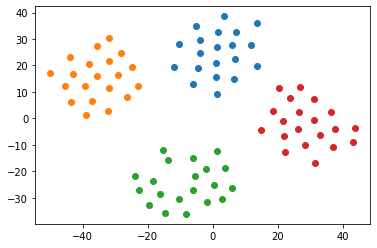

In [95]:
for i in range(4):
  plt.scatter(embed_2d_tsne[i*20:(i+1)*20,0], embed_2d_tsne[i*20:(i+1)*20,1], c=f'C{i}')